In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.style.use('seaborn')

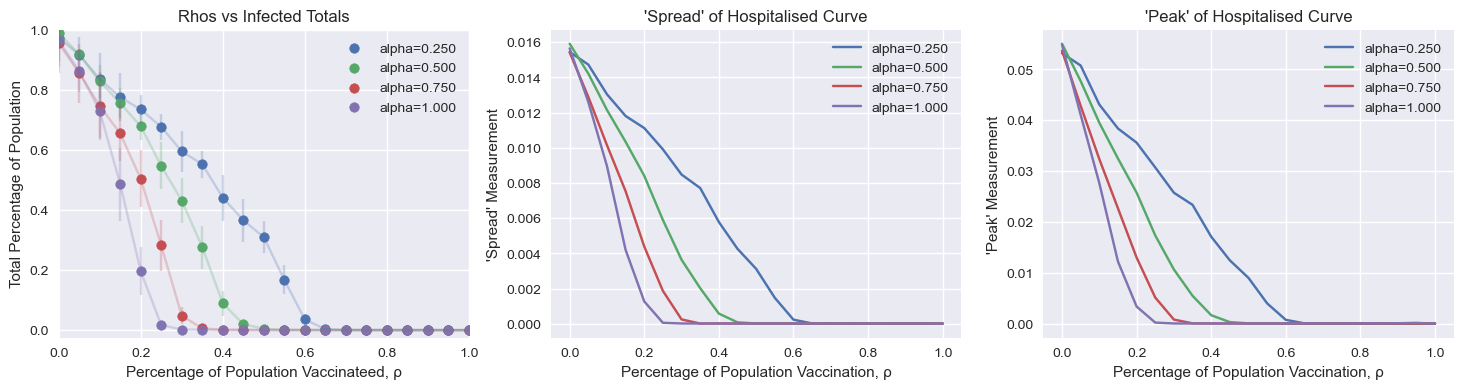

In [2]:
def plot_mixed_totals(run_folder: str, state: str):
    run_folder_path = os.path.join(os.path.abspath('../'), 'records', run_folder)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6*3, 4))
    
    for alpha_folder in os.listdir(run_folder_path):
        alpha = float(re.match(r'alpha=(\d\.\d+)', alpha_folder).groups()[0])
        
        alpha_folder_path = os.path.join(run_folder_path, alpha_folder)
        
        alpha_totals = []
        alpha_errs = []
        
        alpha_spreads = []
        alpha_peaks = []
        
        for rho_folder in os.listdir(alpha_folder_path):
            rho = float(re.match(r'rho=(\d\.\d+)', rho_folder).groups()[0])
            
            rho_folder_path = os.path.join(alpha_folder_path, rho_folder)
        
            totals_df = pd.read_csv(os.path.join(rho_folder_path, 'totals.csv'))
            states_df = pd.read_csv(os.path.join(rho_folder_path, 'states.csv'))
            
            alpha_totals.append((rho, totals_df.iloc[-1][state]))
            alpha_errs.append((rho, totals_df.iloc[-1][state + '_STD']))
            
            alpha_spreads.append((rho, np.std(states_df['Hospitalised'].values)))
            alpha_peaks.append((rho, max(states_df['Hospitalised'].values)))
            
        alpha_totals.sort()
        alpha_errs.sort()
        
        alpha_spreads.sort()
        alpha_peaks.sort()
        
        X = [t[0] for t in alpha_totals]
        y = [t[1] for t in alpha_totals]
        yerr = [t[1] for t in alpha_errs]
        axes[0].scatter(X, y, label=alpha_folder)
        axes[0].errorbar(X, y, yerr=yerr, alpha=0.25)
        
        axes[1].plot([t[0] for t in alpha_spreads], [t[1] for t in alpha_spreads], label=alpha_folder)
        
        axes[2].plot([t[0] for t in alpha_peaks], [t[1] for t in alpha_peaks], label=alpha_folder)
        
    axes[0].set_xlim(0, 1)
    axes[0].set_ylim(-0.025, 1)
    axes[0].set_title(f'Rhos vs {state} Totals')
    axes[0].set_xlabel('Percentage of Population Vaccinateed, ρ')
    axes[0].set_ylabel('Total Percentage of Population')
    axes[0].legend()
    
    axes[1].set_title("'Spread' of Hospitalised Curve")
    axes[1].set_xlabel('Percentage of Population Vaccination, ρ')
    axes[1].set_ylabel("'Spread' Measurement")
    axes[1].legend()
    
    axes[2].set_title("'Peak' of Hospitalised Curve")
    axes[2].set_xlabel('Percentage of Population Vaccination, ρ')
    axes[2].set_ylabel("'Peak' Measurement")
    axes[2].legend()
    
    plt.show()
    
plot_mixed_totals('mixed', 'Infected')

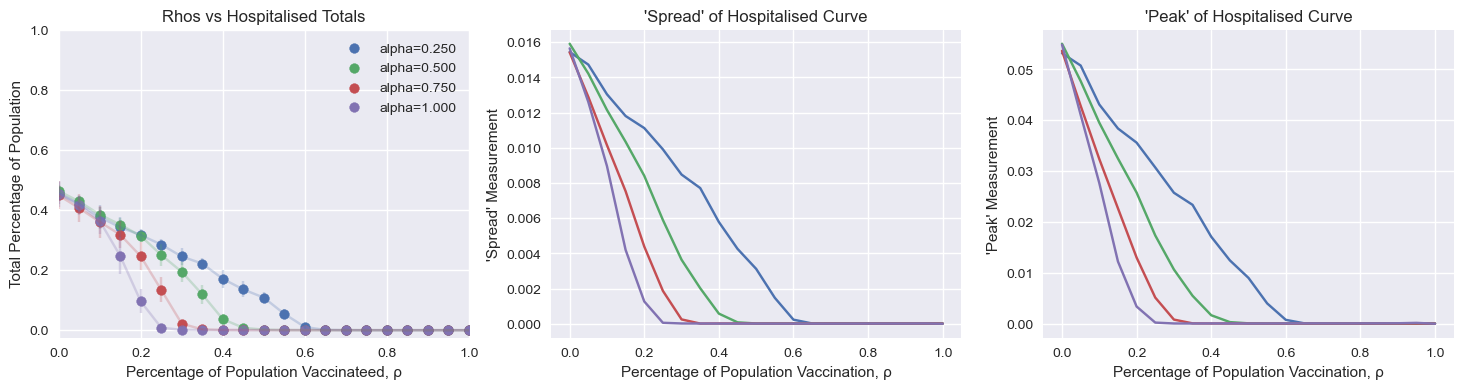

In [4]:
plot_mixed_totals('mixed', 'Hospitalised')

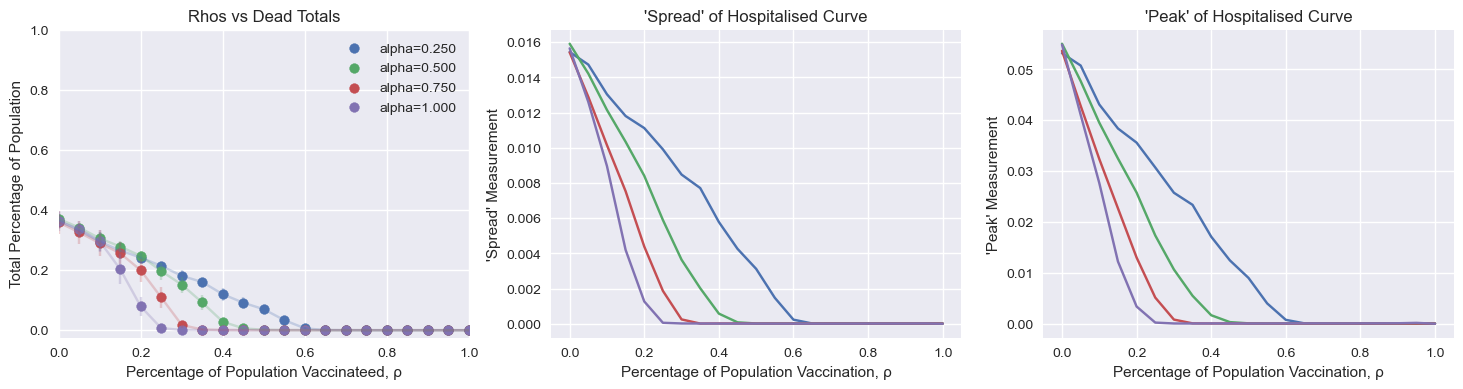

In [5]:
plot_mixed_totals('mixed', 'Dead')